In [1]:
import os
from os.path import join, sep
from glob import glob
from random import choice

In [2]:
import keras_cv
import tensorflow as tf
import matplotlib.pyplot as plt
from dotenv import find_dotenv, load_dotenv

Using TensorFlow backend


/Users/schalappe/Documents/Lab/Engineer/Projects/watermark_resolution/venv/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [3]:
from src.addons.images.load import load_image
from src.addons.augmenters.augment import augment, attacks

---

In [4]:
_ = load_dotenv(find_dotenv())

In [5]:
images_path = glob(join(os.environ.get("RAW_PATH"), "images") + sep + "*.jpg")
image_path = choice(images_path)

In [6]:
image = load_image(image_path)

2023-12-03 14:59:34.964870: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M1 Pro
2023-12-03 14:59:34.964892: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 32.00 GB
2023-12-03 14:59:34.964895: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 10.67 GB
2023-12-03 14:59:34.964926: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:306] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2023-12-03 14:59:34.964940: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:272] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


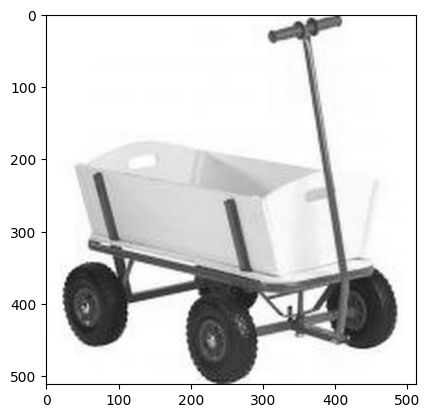

In [7]:
plt.imshow(image.numpy().astype(int), cmap="gray")

In [8]:
image.shape

TensorShape([512, 512, 3])

---

In [9]:
aug_img = augment(tf.expand_dims(image, axis=0))

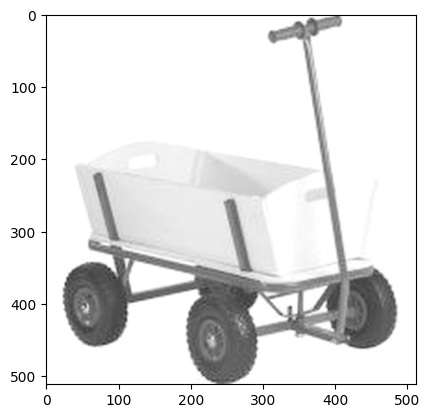

In [10]:
plt.imshow(aug_img[0].numpy().astype(int), cmap="gray")

---

In [11]:
aug_img = attacks["rotation"](tf.expand_dims(image, axis=0))

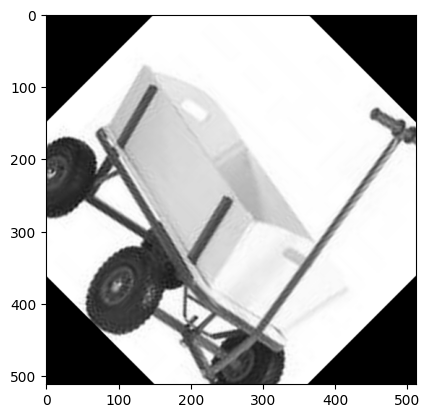

In [12]:
plt.imshow(aug_img[0].numpy().astype(int), cmap="gray")

In [13]:
aug_img = attacks["dropout"](tf.expand_dims(image, axis=0))

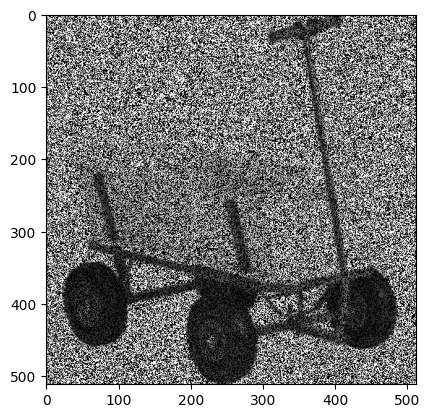

In [14]:
plt.imshow(aug_img[0].numpy().astype(int), cmap="gray")

In [15]:
aug_img = attacks["average_blur"](tf.expand_dims(image, axis=0))

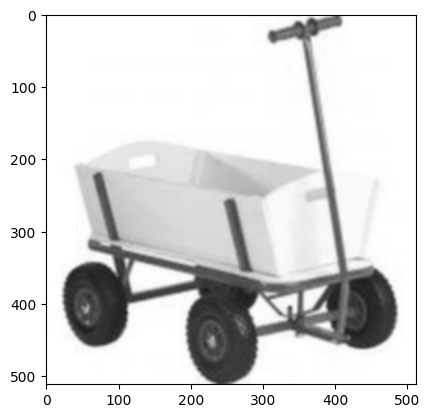

In [16]:
plt.imshow(aug_img[0].numpy().astype(int), cmap="gray")

In [17]:
aug_img = attacks["median_blur"](tf.expand_dims(image, axis=0))

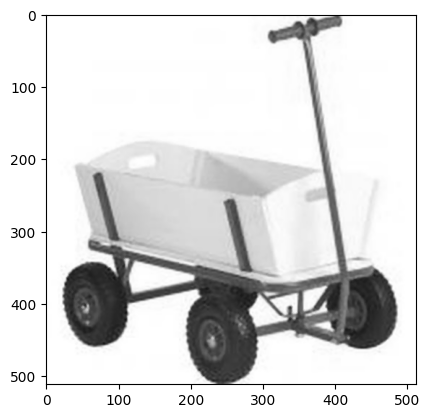

In [18]:
plt.imshow(aug_img[0].numpy().astype(int), cmap="gray")

In [19]:
aug_img = attacks["gaussian_noise"](tf.expand_dims(image, axis=0))

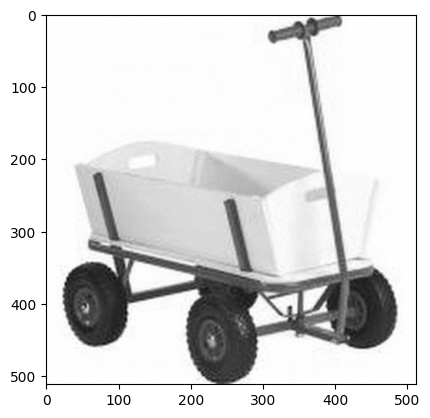

In [20]:
plt.imshow(aug_img[0].numpy().astype(int), cmap="gray")

In [21]:
aug_img = attacks["salt_pepper"](tf.expand_dims(image, axis=0))

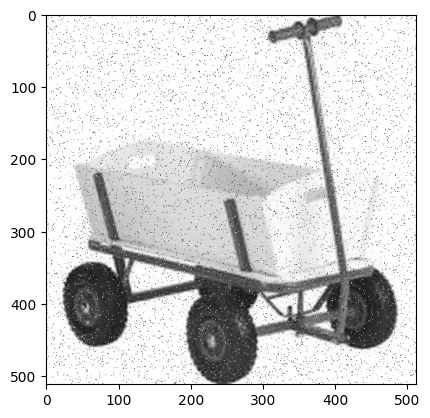

In [22]:
plt.imshow(aug_img[0].numpy().astype(int), cmap="gray")

In [23]:
aug_img = attacks["image_quality"](tf.expand_dims(image, axis=0))

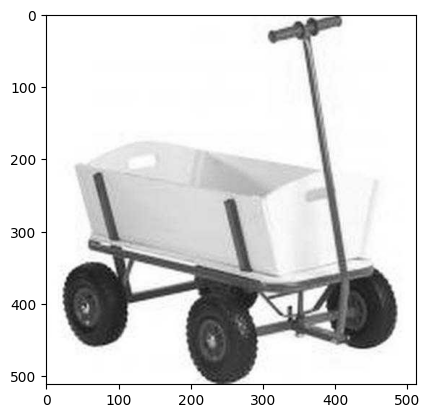

In [24]:
plt.imshow(aug_img[0].numpy().astype(int), cmap="gray")